### PROBLEM STATEMENT
*"Implement pre-trained VGG- 16 and VGG – 19 to perform classification
using with and without trainable layers"*

- Ayushmaan Das (E0121037)

### Importing the Modules

In [ ]:
!unzip ./cats_dogs_small.zip

In [27]:
from keras.applications import VGG16, VGG19

import numpy as np, pandas as pd, matplotlib.pyplot as plt, random

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Input
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

<hr>

### Loading the pre-built model

In [28]:
conv_base_vgg16 = VGG16(weights="imagenet", include_top=False, input_shape = (150,150,3))

In [29]:
conv_base_vgg19 = VGG19(weights="imagenet", include_top=False, input_shape = (150,150,3))

80134624/80134624 [==============================] - 3s 0us/step


<hr>

### Image Augmentation

In [9]:
train_path = "/content/catsAndDogs40/train"
test_path = "/content/catsAndDogs40/test"

In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
training_set = train_datagen.flow_from_directory(train_path, target_size=(150,150), batch_size=20, class_mode='binary')

test_set = test_datagen.flow_from_directory(test_path, target_size=(150,150), batch_size=20, class_mode='binary')

Found 64 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


<hr>

### Without Trainable Layers

- using the existing Keras VGG-16 Model
- can't update or customize weights and parameters at various layers

In [31]:
for layer in conv_base_vgg16.layers:
  layer.trainable = False

for layer in conv_base_vgg19.layers:
  layer.trainable = False

In [32]:
x1 = Flatten()(conv_base_vgg16.output)
x2 = Flatten()(conv_base_vgg19.output)

prediction1 = Dense(1, activation='sigmoid')(x1)

prediction2 = Dense(1, activation='sigmoid')(x2)

In [33]:
model_vgg16 = Model(inputs=conv_base_vgg16.input, outputs=prediction1)
model_vgg19 = Model(inputs=conv_base_vgg19.input, outputs=prediction2)

In [34]:
model_vgg16.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_vgg19.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [35]:
hist = model_vgg16.fit(
    training_set, validation_data=test_set, epochs = 25, steps_per_epoch=len(training_set), validation_steps=len(test_set)
)

Epoch 1/25
4/4 [==============================] - 2s 315ms/step - loss: 0.7736 - accuracy: 0.4844 - val_loss: 0.6118 - val_accuracy: 0.6250
Epoch 2/25
4/4 [==============================] - 1s 158ms/step - loss: 0.6230 - accuracy: 0.6875 - val_loss: 0.6027 - val_accuracy: 0.6875
Epoch 3/25
4/4 [==============================] - 1s 158ms/step - loss: 0.5105 - accuracy: 0.7969 - val_loss: 0.5393 - val_accuracy: 0.7500
Epoch 4/25
4/4 [==============================] - 1s 157ms/step - loss: 0.4300 - accuracy: 0.8281 - val_loss: 0.5312 - val_accuracy: 0.6875
Epoch 5/25
4/4 [==============================] - 0s 110ms/step - loss: 0.3666 - accuracy: 0.8750 - val_loss: 0.5755 - val_accuracy: 0.5625
Epoch 6/25
4/4 [==============================] - 0s 116ms/step - loss: 0.3546 - accuracy: 0.9375 - val_loss: 0.5332 - val_accuracy: 0.7500
Epoch 7/25
4/4 [==============================] - 1s 156ms/step - loss: 0.2878 - accuracy: 0.9375 - val_loss: 0.5241 - val_accuracy: 0.7500
Epoch 8/25
4/4 [====

In [36]:
hist2 = model_vgg19.fit(
    training_set, validation_data=test_set, epochs = 25, steps_per_epoch=len(training_set), validation_steps=len(test_set)
)

Epoch 1/25
4/4 [==============================] - 2s 190ms/step - loss: 0.7336 - accuracy: 0.5312 - val_loss: 0.7705 - val_accuracy: 0.5625
Epoch 2/25
4/4 [==============================] - 1s 119ms/step - loss: 0.6040 - accuracy: 0.6094 - val_loss: 0.7313 - val_accuracy: 0.5000
Epoch 3/25
4/4 [==============================] - 1s 115ms/step - loss: 0.5052 - accuracy: 0.7969 - val_loss: 0.7096 - val_accuracy: 0.6875
Epoch 4/25
4/4 [==============================] - 1s 160ms/step - loss: 0.4483 - accuracy: 0.8125 - val_loss: 0.7057 - val_accuracy: 0.6250
Epoch 5/25
4/4 [==============================] - 1s 117ms/step - loss: 0.4055 - accuracy: 0.8438 - val_loss: 0.7099 - val_accuracy: 0.5625
Epoch 6/25
4/4 [==============================] - 1s 121ms/step - loss: 0.3249 - accuracy: 0.9375 - val_loss: 0.7216 - val_accuracy: 0.6875
Epoch 7/25
4/4 [==============================] - 1s 268ms/step - loss: 0.3231 - accuracy: 0.8906 - val_loss: 0.7713 - val_accuracy: 0.5625
Epoch 8/25
4/4 [====

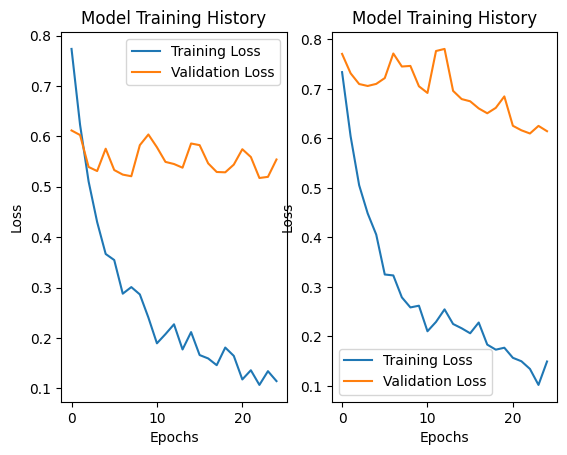

In [39]:
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training History')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist2.history['loss'], label='Training Loss')
plt.plot(hist2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training History')
plt.legend()
plt.show()

<hr>

### Making few selective layers trainable


- Unfreezing few base layers
- The selcted layers of the frozen model will undergo weight updation

In [42]:
trainable_layers = ['block1_conv2', 'block3_conv3', 'block5_conv1']

In [43]:
for layer in conv_base_vgg16.layers:
  if layer.name in trainable_layers:
    layer.set_trainable = True

In [44]:
for layer in conv_base_vgg19.layers:
  if layer.name in trainable_layers:
    layer.set_trainable = True

Adding our own layers

In [45]:
x1 = Flatten()(conv_base_vgg16.output)
x2 = Flatten()(conv_base_vgg19.output)

prediction1_a = Dense(1, activation='sigmoid')(x1)

prediction2_a = Dense(1, activation='sigmoid')(x2)

In [46]:
model_vgg16_2 = Model(inputs=conv_base_vgg16.input, outputs=prediction1_a)
model_vgg19_2 = Model(inputs=conv_base_vgg19.input, outputs=prediction2_a)

In [47]:
model_vgg16_2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_vgg19_2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [51]:
hist1_a = model_vgg16_2.fit(
    training_set, validation_data=test_set, epochs = 25, steps_per_epoch=len(training_set), validation_steps=len(test_set)
)

Epoch 1/25
4/4 [==============================] - 1s 251ms/step - loss: 0.1287 - accuracy: 0.9688 - val_loss: 0.5023 - val_accuracy: 0.6875
Epoch 2/25
4/4 [==============================] - 1s 241ms/step - loss: 0.1402 - accuracy: 0.9375 - val_loss: 0.5094 - val_accuracy: 0.7500
Epoch 3/25
4/4 [==============================] - 1s 182ms/step - loss: 0.1071 - accuracy: 0.9844 - val_loss: 0.5140 - val_accuracy: 0.7500
Epoch 4/25
4/4 [==============================] - 1s 278ms/step - loss: 0.1039 - accuracy: 1.0000 - val_loss: 0.4866 - val_accuracy: 0.7500
Epoch 5/25
4/4 [==============================] - 1s 341ms/step - loss: 0.1018 - accuracy: 0.9688 - val_loss: 0.4792 - val_accuracy: 0.7500
Epoch 6/25
4/4 [==============================] - 2s 444ms/step - loss: 0.1202 - accuracy: 0.9531 - val_loss: 0.4838 - val_accuracy: 0.7500
Epoch 7/25
4/4 [==============================] - 2s 372ms/step - loss: 0.1079 - accuracy: 1.0000 - val_loss: 0.5136 - val_accuracy: 0.7500
Epoch 8/25
4/4 [====

In [52]:
hist2_a = model_vgg19_2.fit(
    training_set, validation_data=test_set, epochs = 25, steps_per_epoch=len(training_set), validation_steps=len(test_set)
)

Epoch 1/25
4/4 [==============================] - 1s 182ms/step - loss: 0.1411 - accuracy: 0.9688 - val_loss: 0.5301 - val_accuracy: 0.7500
Epoch 2/25
4/4 [==============================] - 1s 169ms/step - loss: 0.1664 - accuracy: 0.9531 - val_loss: 0.4915 - val_accuracy: 0.8125
Epoch 3/25
4/4 [==============================] - 1s 121ms/step - loss: 0.1496 - accuracy: 0.9531 - val_loss: 0.5350 - val_accuracy: 0.6875
Epoch 4/25
4/4 [==============================] - 1s 168ms/step - loss: 0.1717 - accuracy: 0.9688 - val_loss: 0.5069 - val_accuracy: 0.7500
Epoch 5/25
4/4 [==============================] - 1s 124ms/step - loss: 0.1225 - accuracy: 0.9844 - val_loss: 0.5100 - val_accuracy: 0.8125
Epoch 6/25
4/4 [==============================] - 1s 118ms/step - loss: 0.1145 - accuracy: 0.9844 - val_loss: 0.5217 - val_accuracy: 0.6875
Epoch 7/25
4/4 [==============================] - 1s 156ms/step - loss: 0.1196 - accuracy: 0.9844 - val_loss: 0.5123 - val_accuracy: 0.8125
Epoch 8/25
4/4 [====

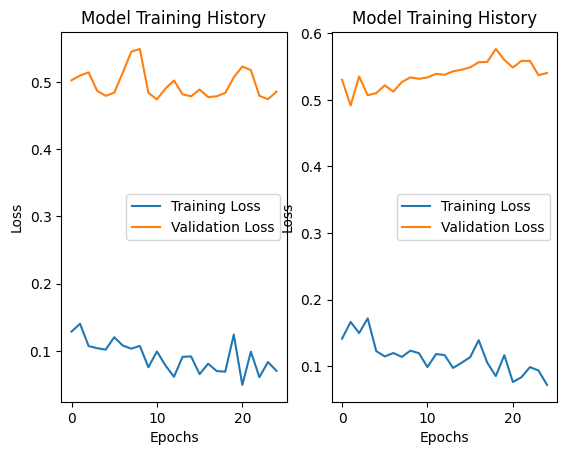

In [53]:
plt.subplot(1,2,1)
plt.plot(hist1_a.history['loss'], label='Training Loss')
plt.plot(hist1_a.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training History')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist2_a.history['loss'], label='Training Loss')
plt.plot(hist2_a.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training History')
plt.legend()
plt.show()

<hr>

### Prediction on a non-dataset image

In [ ]:
img_path = 'dog-test1.jpg'
img = image.load_img(img_path, target_size=(150, 150))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

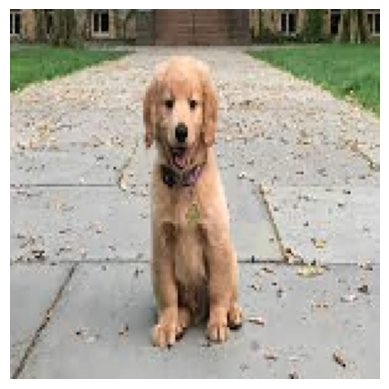

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
preds = model_vgg19.predict(img_array)
print(preds[0][0])

if preds[0] < 0.5:
  print("CAT")
else:
  print("DOG")

1/1 [==============================] - 0s 39ms/step
0.5581799
DOG


<hr><hr>